In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [3]:
house_price_dataframe = pd.DataFrame(house_price_dataset.data,columns = house_price_dataset.feature_names)

In [4]:
house_price_dataframe['Price'] = house_price_dataset.target

In [5]:
X = house_price_dataframe.drop(['Price'],axis=1)
Y = house_price_dataframe['Price']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [15]:
Y_train_predict = regressor.predict(X_train)
r_train = metrics.r2_score(Y_train_predict, Y_train)
mse_train = mean_squared_error(Y_train_predict, Y_train)
print(r_train)
print(mse_train)

0.3465396386146963
0.5214403564745769


In [17]:
Y_test_predict = regressor.predict(X_test)
r_test = metrics.r2_score(Y_test_predict, Y_test)
mse_test = mean_squared_error(Y_test_predict, Y_test)
print(r_test)
print(mse_test)

0.3548262715503687
0.5363427302501913


In [19]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题

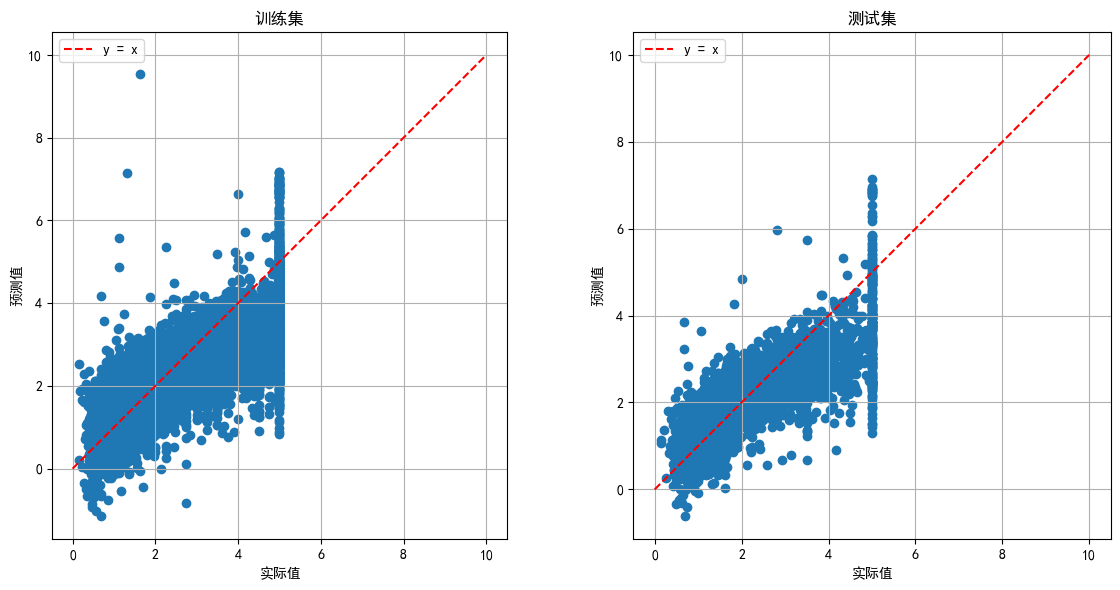

In [21]:
x_values = np.linspace(0, 10, 100)
fig_size = (12, 6)  # 12 英寸宽, 6 英寸高
fig, ax = plt.subplots(1, 2, figsize=fig_size)

ax[0].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[0].scatter(Y_train, Y_train_predict)
ax[0].set_xlabel("实际值")
ax[0].set_ylabel("预测值")
ax[0].set_title("训练集")
ax[0].set_aspect('equal', adjustable='box')
ax[0].legend()
ax[0].grid()

ax[1].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[1].scatter(Y_test, Y_test_predict)
ax[1].set_xlabel("实际值")
ax[1].set_ylabel("预测值")
ax[1].set_title("测试集")
ax[1].set_aspect('equal', adjustable='box')
ax[1].legend()
ax[1].grid()
plt.savefig("线性回归-默认.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()


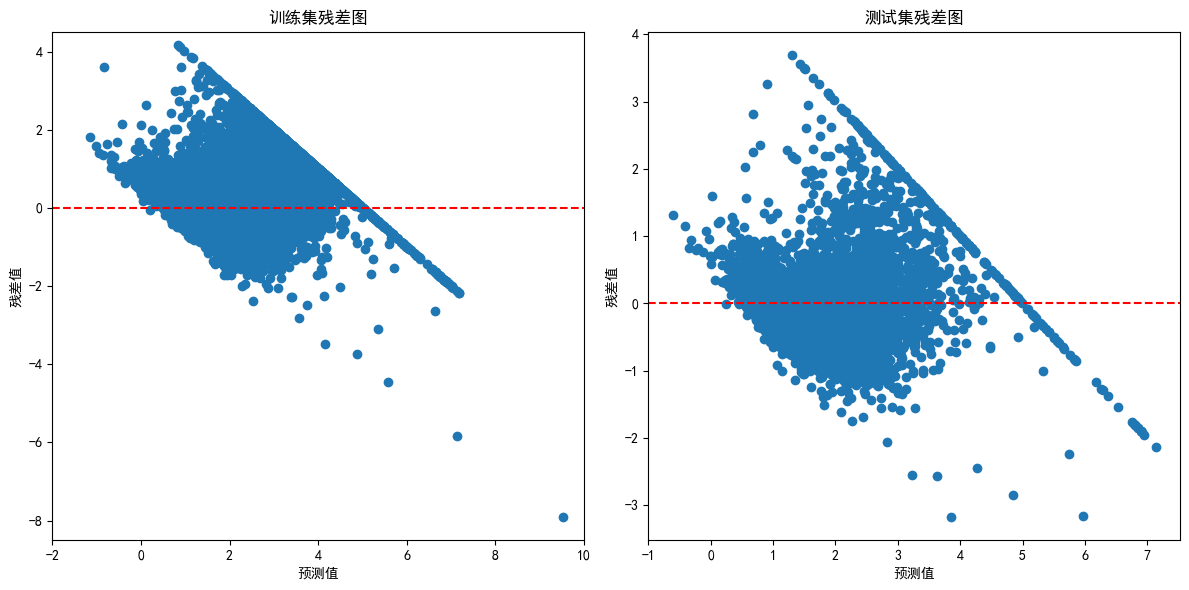

In [22]:
residuals_train = Y_train-Y_train_predict
residuals_test = Y_test-Y_test_predict
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(Y_train_predict, residuals_train)
ax[0].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[0].set_title('训练集残差图')
ax[0].set_xlabel('预测值')
ax[0].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 

ax[1].scatter(Y_test_predict, residuals_test)
ax[1].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[1].set_title('测试集残差图')
ax[1].set_xlabel('预测值')
ax[1].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 
plt.savefig("线性回归-默认-残差.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()